In [1]:
#Packages used for the k-means clusters
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
from sklearn import preprocessing as per
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import csv
%matplotlib inline

In [2]:
#Input in CSV file removing the ultra high revenue outliers
df = pd.read_csv("input file.csv")
df.head()

,iso,Country,Secured_Vaccine_Supply_(Percent),Vaccine_Doses_Received_Percent,vaccine_willingness_monthly,h7_vaccinationpolicy,stringencyindex,uhc,casescumulativetotalper100000pop,casesnewlyreportedinlast7daysper,deathscumulativetotalper100000po,total_vaccinations_per100,persons_vaccinated_atleast_once,persons_fully_vaccinated_per100,total_boosters_per_hundred,first_vaccine_date,number_vaccines_types_used,Average trend
0,VNM,The Socialist Republic of Viet Nam,136.60,181.94,99.1,5.0,68.519997,75.0,2214.7271,113.51500,37.891998,170.050000,80.675003,73.914001,NaN,08/03/2021,6,12.88
1,MYS,Malaysia,146.16,200.60,98.8,5.0,50.459999,73.0,8762.7734,78.69400,98.566002,186.049000,80.386002,78.599998,33.270000,24/02/2021,5,13.97
2,KWT,The State of Kuwait,90.47,180.93,98.8,5.0,26.850000,76.0,11769.6210,752.87402,58.236000,169.619000,78.619003,75.982002,8.800000,28/12/2020,5,17.69
3,BGD,The People's Republic of Bangladesh,110.09,200.65,98.6,5.0,64.809998,48.0,1041.9600,50.52100,17.157000,89.717003,54.886002,34.831001,0.680000,27/01/2021,8,17.73
4,BHR,The Kingdom of Bahrain,103.36,206.71,98.6,5.0,32.410000,77.0,19638.5120,1366.85100,82.218002,195.679990,71.260002,70.028999,53.060001,04/11/2020,8,21.76


In [3]:
#Shape of the dataframe
df.shape

(94, 18)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso                               94 non-null     object 
 1   Country                           94 non-null     object 
 2   Secured_Vaccine_Supply_(Percent)  94 non-null     float64
 3   Vaccine_Doses_Received_Percent    94 non-null     float64
 4   vaccine_willingness_monthly       94 non-null     float64
 5   h7_vaccinationpolicy              92 non-null     float64
 6   stringencyindex                   92 non-null     float64
 7   uhc                               93 non-null     float64
 8   casescumulativetotalper100000pop  94 non-null     float64
 9   casesnewlyreportedinlast7daysper  94 non-null     float64
 10  deathscumulativetotalper100000po  94 non-null     float64
 11  total_vaccinations_per100         94 non-null     float64
 12  persons_va

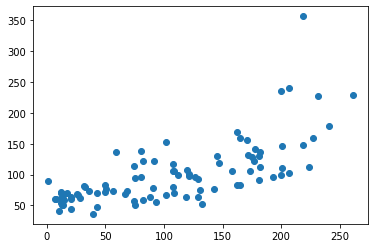

In [5]:
#Initial exploratory scatterplot
plt.scatter(df['Vaccine_Doses_Received_Percent'],df['Secured_Vaccine_Supply_(Percent)'])

In [166]:
#Generating the KM function
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [167]:
#Creating the predicted cluster values
y_predicted = km.fit_predict(df[['persons_vaccinated_atleast_once','Secured_Vaccine_Supply_(Percent)']])
y_predicted

array([3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 3, 0, 2, 3, 3, 3, 3, 3,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 3, 0, 4, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0,
       1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       0, 1, 1, 1, 1, 0])

In [168]:
 #Creating a new column called cluster that contains the y_predicted cluster values
 df['cluster'] = y_predicted
 df.head()

,iso,Country,Secured_Vaccine_Supply_(Percent),Vaccine_Doses_Received_Percent,vaccine_willingness_monthly,h7_vaccinationpolicy,stringencyindex,uhc,casescumulativetotalper100000pop,casesnewlyreportedinlast7daysper,deathscumulativetotalper100000po,total_vaccinations_per100,persons_vaccinated_atleast_once,persons_fully_vaccinated_per100,total_boosters_per_hundred,first_vaccine_date,number_vaccines_types_used,Average trend,cluster
0,VNM,The Socialist Republic of Viet Nam,136.60,181.94,99.1,5.0,68.519997,75.0,2214.7271,113.51500,37.891998,170.050000,80.675003,73.914001,NaN,08/03/2021,6,12.88,3
1,MYS,Malaysia,146.16,200.60,98.8,5.0,50.459999,73.0,8762.7734,78.69400,98.566002,186.049000,80.386002,78.599998,33.270000,24/02/2021,5,13.97,3
2,KWT,The State of Kuwait,90.47,180.93,98.8,5.0,26.850000,76.0,11769.6210,752.87402,58.236000,169.619000,78.619003,75.982002,8.800000,28/12/2020,5,17.69,0
3,BGD,The People's Republic of Bangladesh,110.09,200.65,98.6,5.0,64.809998,48.0,1041.9600,50.52100,17.157000,89.717003,54.886002,34.831001,0.680000,27/01/2021,8,17.73,0
4,BHR,The Kingdom of Bahrain,103.36,206.71,98.6,5.0,32.410000,77.0,19638.5120,1366.85100,82.218002,195.679990,71.260002,70.028999,53.060001,04/11/2020,8,21.76,0


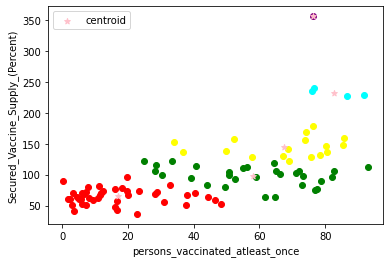

In [169]:
#Cluster scatter graph
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.persons_vaccinated_atleast_once,df1['Secured_Vaccine_Supply_(Percent)'],color='green')
plt.scatter(df2.persons_vaccinated_atleast_once,df2['Secured_Vaccine_Supply_(Percent)'],color='red')
plt.scatter(df3.persons_vaccinated_atleast_once,df3['Secured_Vaccine_Supply_(Percent)'],color='cyan')
plt.scatter(df4.persons_vaccinated_atleast_once,df4['Secured_Vaccine_Supply_(Percent)'],color='yellow')
plt.scatter(df5.persons_vaccinated_atleast_once,df5['Secured_Vaccine_Supply_(Percent)'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='pink',marker='*',label='centroid')
plt.xlabel('persons_vaccinated_atleast_once')
plt.ylabel('Secured_Vaccine_Supply_(Percent)')
plt.legend()

In [171]:
#Uses k_rng to work out the sse value for creation of the elbow chart
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['persons_vaccinated_atleast_once','Secured_Vaccine_Supply_(Percent)']])
    sse.append(km.inertia_)

In [172]:
sse

[315833.85857377964,
 150242.589926089,
 73310.39018674094,
 51647.03702848984,
 39419.36387252984,
 30642.518982526653,
 23270.907973887937,
 20171.03363949663,
 16944.684581422847]

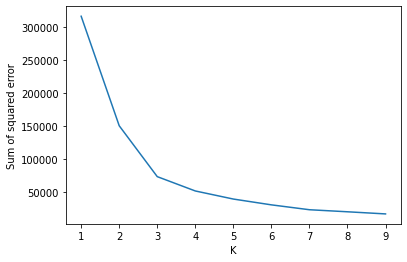

In [173]:
#Elbow chart
#This checks to see how many clusters the data should have by the elbow point
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [174]:
#Outputs to csv file
df.to_csv(r'output file.csv', index = False)